# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style for better aesthetics
sns.set(style="whitegrid")

In [4]:
# Read in the data set
try:
    # Read the CSV file into a DataFrame
    df = pd.read_csv('ames.csv')
    
    # Display the first 5 rows to confirm data loading
    print("Dataset loaded successfully.")
    print(df.head())

except FileNotFoundError:
    print("Error: The file 'ames.csv' was not found.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")

Dataset loaded successfully.
   Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0        1960            1960           1080          1656              0   
1        1961            1961            882           896              0   
2        1958            1958           1329          1329              0   
3        1968            1968           2110          2110              0   
4        1997            1998            928           928            701   

   Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0         1656          1          0              3              1   
1          896          1          0              2              1   
2         1329          1          1              3              1   
3         2110          2          1              3              1   
4         1629          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Area  Sale_Price  
0              7           2   

In [5]:
# Clean and pre-process the data if neccessary
# Check for missing values
if df.isnull().sum().sum() > 0:
    print("Missing values detected. Dropping incomplete rows...")
    df = df.dropna()
else:
    print("No missing values found.")

# Verify that the required columns exist
required_cols = ['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']
if not set(required_cols).issubset(df.columns):
    raise ValueError(f"Missing required columns: {required_cols}")

print("Data cleaning complete.")

No missing values found.
Data cleaning complete.


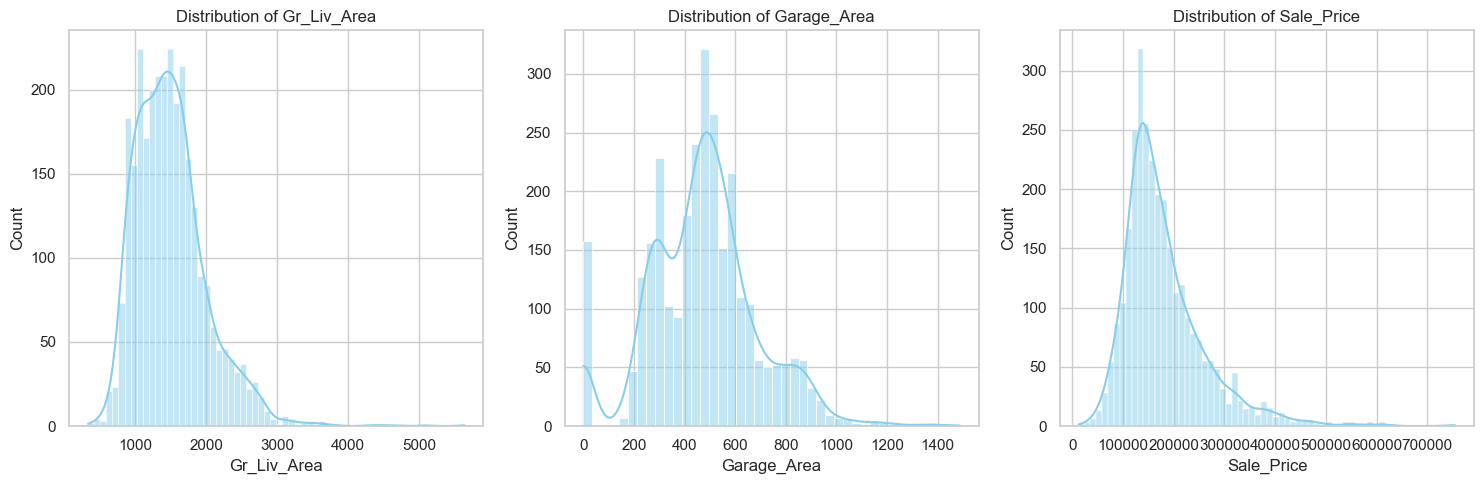


Correlation Matrix:
              Gr_Liv_Area  Garage_Area  Sale_Price
Gr_Liv_Area     1.000000     0.483971    0.706780
Garage_Area     0.483971     1.000000    0.640138
Sale_Price      0.706780     0.640138    1.000000


In [6]:
# Explore the data with visualisations such as histograms and correlation matrices
# Plot histograms for the relevant variables
plt.figure(figsize=(15, 5))

cols_to_plot = ['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Display the correlation matrix for these variables
correlation = df[cols_to_plot].corr()
print("\nCorrelation Matrix:\n", correlation)

In [7]:
# Split the independent variables from the dependent variable
# Define Independent variables (X) and Dependent variable (y)
X = df[['Gr_Liv_Area', 'Garage_Area']]
y = df['Sale_Price']

# Verify the shapes of X and y
print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")

Features shape (X): (2930, 2)
Target shape (y): (2930,)


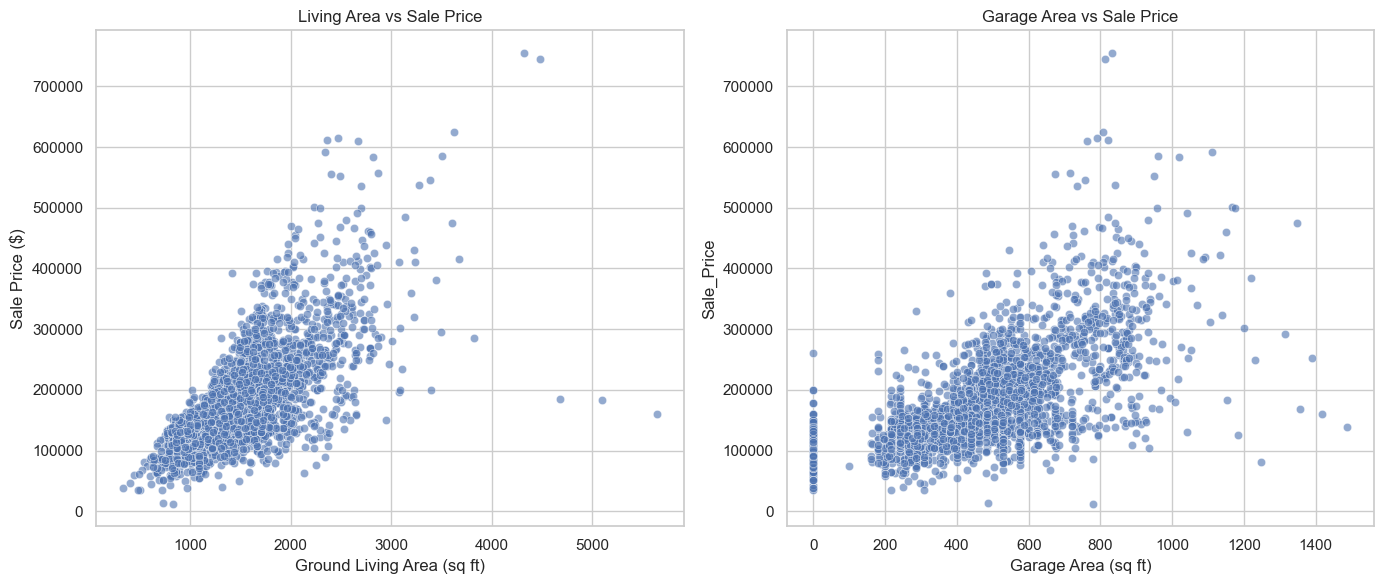

In [8]:
# Generate plots to explore the relationships between the independent and dependent variables
plt.figure(figsize=(14, 6))

# Plot Gr_Liv_Area vs Sale_Price
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Gr_Liv_Area'], y=df['Sale_Price'], alpha=0.6)
plt.title('Living Area vs Sale Price')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

# Plot Garage_Area vs Sale_Price
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Garage_Area'], y=df['Sale_Price'], alpha=0.6)
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area (sq ft)')

plt.tight_layout()
plt.show()

In [9]:
# Create a training and test set with a 75:25 split ratio
# Split data: 75% training and 25% testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2197
Test set size: 733


In [10]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [11]:
# Print the trained model's intercept and coefficients
intercept = model.intercept_
coeffs = model.coef_

print(f"Model Intercept: {intercept:.2f}")
print("Coefficients:")
for feature, coef in zip(X.columns, coeffs):
    print(f"  - {feature}: {coef:.2f}")

Model Intercept: -5059.45
Coefficients:
  - Gr_Liv_Area: 78.69
  - Garage_Area: 141.15


In [12]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Display the first 5 predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

      Actual      Predicted
1357  161000  158224.094309
2367  116000  113256.675789
2822  196500  217552.819113
2126  123600   72846.491601
1544  126000   94782.712872


In [13]:
# Evaluate the model's performance by computing the mean squared error (MSE) or root mean squared error (RMSE) on the test set using sklearn.metrics.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"  - Mean Squared Error (MSE): {mse:.2f}")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  - R-squared Score (R2): {r2:.4f}")

Model Performance Metrics:
  - Mean Squared Error (MSE): 2634371879.69
  - Root Mean Squared Error (RMSE): 51326.13
  - R-squared Score (R2): 0.6386


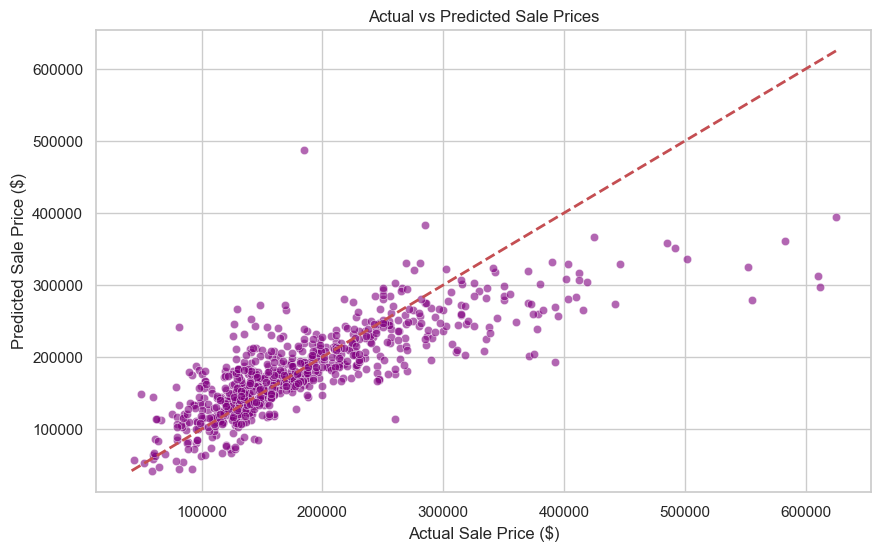

In [14]:
# Generate an error plot to visualise the differences between the predicted and actual values in the test set.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')

# Add a diagonal line representing perfect predictions
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.show()

In [15]:
# Print the coefficients and interpret them within the context of the median value prediction.
print("Interpretation of Coefficients:")
print(f"Intercept: ${model.intercept_:,.2f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: ${coef:,.2f}")

print("\nContext:")
print("- Intercept: Baseline price if Living & Garage Area are 0.")
print("- Gr_Liv_Area: Price increase per sq ft of living area.")
print("- Garage_Area: Price increase per sq ft of garage area.")

Interpretation of Coefficients:
Intercept: $-5,059.45
Gr_Liv_Area: $78.69
Garage_Area: $141.15

Context:
- Intercept: Baseline price if Living & Garage Area are 0.
- Gr_Liv_Area: Price increase per sq ft of living area.
- Garage_Area: Price increase per sq ft of garage area.
